In [1]:
import sys
import os
import math
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.abspath('..'))

from src.models.reshape import DataTransformer
from src.visualization.visualize import seaborn_style
from src.visualization.colors import purples, oranges, blues, reds, greens

seaborn_style(purples["0"])

In [2]:
transformer = DataTransformer()
listen_history = transformer.get_data()
listen_history.head()

,title,subtitles,time,artist,date,month
0,Faded (Acoustic Version),"[{'name': 'Sara Farell - Topic', 'url': 'https...",2025-04-07 22:11:13.451000+00:00,Sara Farell,2025-04-07,2025-04-01
1,Daylight,"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2025-04-07 22:06:19.931000+00:00,Taylor Swift,2025-04-07,2025-04-01
2,One More Pull,"[{'name': 'The Wellermen - Topic', 'url': 'htt...",2025-04-07 22:06:16.322000+00:00,The Wellermen,2025-04-07,2025-04-01
3,omplex (demo),"[{'name': 'Katie Gregson-MacLeod - Topic', 'ur...",2025-04-07 22:01:59.785000+00:00,Katie Gregson-MacLeod,2025-04-07,2025-04-01
4,Little Swing,[{'name': 'AronChupa & Little Sis Nora - Topic...,2025-04-07 21:57:28.153000+00:00,AronChupa & Little Sis Nora,2025-04-07,2025-04-01


In [3]:
def artist_share_by_month(n_months):
    n_months_of_data_grouped = (
        transformer.data_for_timeframe(listen_history, n_months)
            .groupby(['month', 'artist'])
            .size()
            .reset_index(name='count')
    )

    n_months_of_data_grouped['percentage'] = n_months_of_data_grouped['count'] / n_months_of_data_grouped.groupby('month')['count'].transform('sum') * 100
    artist_share_by_month = (
        n_months_of_data_grouped[['month', 'artist', 'percentage']]
        .groupby(['month', 'artist'])
        .sum()
        .reset_index()
        .pivot(index='month', columns='artist', values='percentage').fillna(0)
        .reset_index()
    )
    artist_share_by_month.set_index('month', inplace=True)
    return artist_share_by_month

artist_share_by_month(12).tail()

artist,50 Cent,8 Bit Universe,A Great Big World,A Touch of Class,A-ha,AURORA,AViVA,AWOLNATION,Adele,Alan Walker,...,ttb2,yoshi285,Ólafur Arnalds,Восход,Милана Хаметова,Наталия Фаустова,Наталья Фаустова,Нежное Это,Сёстры Каратыгины,ТАЙПАН
month,,,,,,,,,,,,,,,,,,,,,
2024-12-01,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.625000,0.0,0.0,0.0,0.0,1.250000
2025-01-01,0.680272,0.0,0.0,0.0,0.000000,0.0,0.000000,0.680272,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.680272
2025-02-01,0.000000,0.0,0.0,0.0,0.276243,0.0,0.276243,0.000000,0.0,0.0,...,0.0,0.276243,0.0,0.0,0.828729,0.0,0.0,0.0,0.0,0.552486
2025-03-01,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.512821,0.0,0.0,0.512821,0.0,0.0,0.0,0.0,1.025641
2025-04-01,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [4]:
def plot_for_artist(df, artist, n_months):
    col = df.pop(artist)
    df.insert(0, col.name, col)
    
    grays = ['0.6', '0.7', '0.8', '0.9']
    colors = [purples["5"]] + grays * math.ceil((len(df.columns) - 1)/len(grays))

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.stackplot(df.index, df.T, labels=df.columns, alpha=0.7, colors=colors, linewidth=0)

    ax.set_title(f'Ratio of {artist} Listens vs. Other Artist Listens Each Month Over {n_months} Months')
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Month')
    ax.legend([artist, 'Other'])
    ax.margins(x=0, y=0)

    plt.show()
    fig.savefig(f"../reports/figures/artists/ratio_of_{artist.lower().replace(' ', '_')}_listens_over_{n_months}_months.png")

/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_32145/2176994922.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(0, col.name, col)


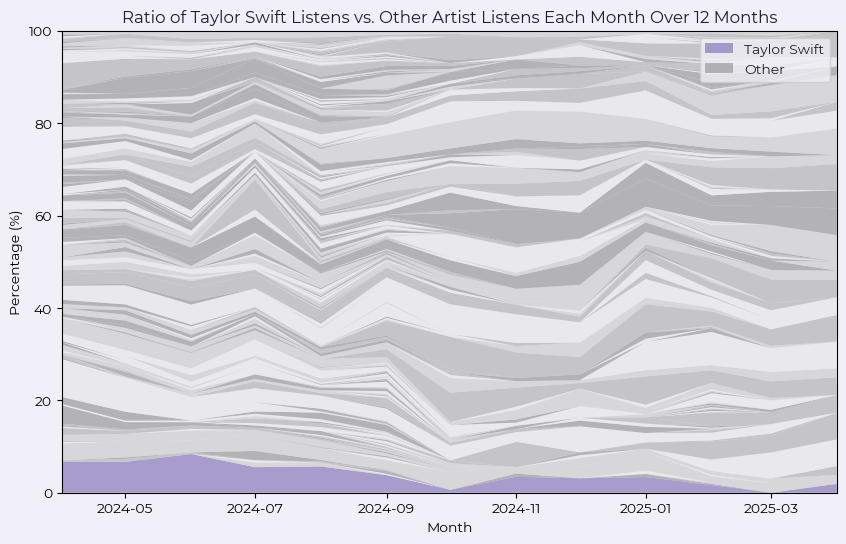

In [5]:
artist_share_over_12_months = artist_share_by_month(12)
plot_for_artist(artist_share_over_12_months, 'Taylor Swift', 12)

/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_32145/2176994922.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(0, col.name, col)


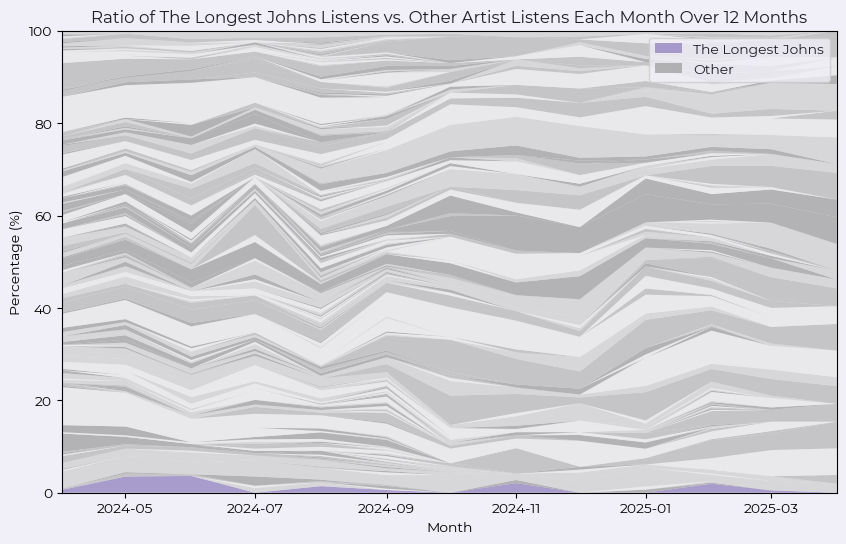

In [6]:
artist_share_over_12_months = artist_share_by_month(12)
plot_for_artist(artist_share_over_12_months, 'The Longest Johns', 12)

/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_32145/2176994922.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(0, col.name, col)


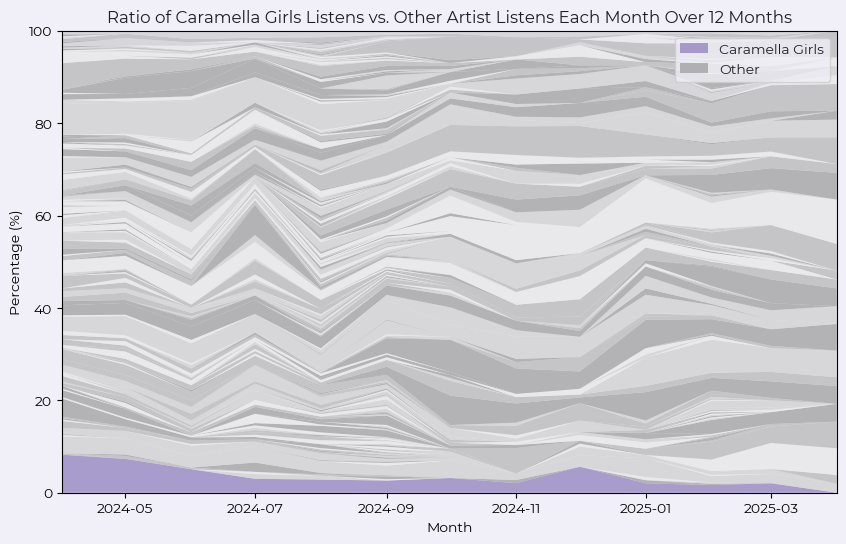

In [7]:
artist_share_over_12_months = artist_share_by_month(12)
plot_for_artist(artist_share_over_12_months, 'Caramella Girls', 12)

In [8]:
top_artists = (
    listen_history[['artist', 'month']]
    .groupby('artist')
    .size()
    .reset_index(name='count')
    .sort_values("count", ascending=False)
    .head(5)['artist']
    .tolist()
)
top_artists

['Taylor Swift',
 'Johan Söderqvist',
 'Caramella Girls',
 'The Longest Johns',
 'TheFatRat']

In [9]:
data = listen_history[['artist', 'date']].groupby(['artist', 'date']).size().reset_index(name='count')
data = data.pivot(index='date', columns='artist').fillna(0)
data = data.stack().reset_index()
data['cumulative_listens'] = data.groupby('artist')['count'].cumsum()
data.sort_values(by='cumulative_listens', ascending=False, inplace=True)
data.head()

,date,artist,count,cumulative_listens
1397466,2025-04-07,Taylor Swift,1.0,1611.0
1368885,2025-02-20,Taylor Swift,0.0,1610.0
1386578,2025-03-19,Taylor Swift,0.0,1610.0
1394744,2025-04-02,Taylor Swift,0.0,1610.0
1393383,2025-03-31,Taylor Swift,0.0,1610.0


In [10]:
def cumulative_for_artist(df):
    pivot_df = df.pivot(index='date', columns='artist', values='cumulative_listens')

    fig = plt.figure(figsize=(12, 6))
    
    for artist in [x for x in pivot_df if x not in top_artists]:
        plt.plot(pivot_df.index, pivot_df[artist], label=None, color=purples['1'])

    colors = [oranges['7'], blues['7'], reds['7'], greens['7'], purples['7']]
    
    for artist in top_artists:
        color = colors[top_artists.index(artist)]
        plt.plot(pivot_df.index, pivot_df[artist], label=artist, color=color)
    
    plt.title('Cumulative Listens Over Time by Artist')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Listens')
    plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    fig.savefig(f"../reports/figures/artists/cumulative_track_listens_by_artist.png", bbox_inches='tight')

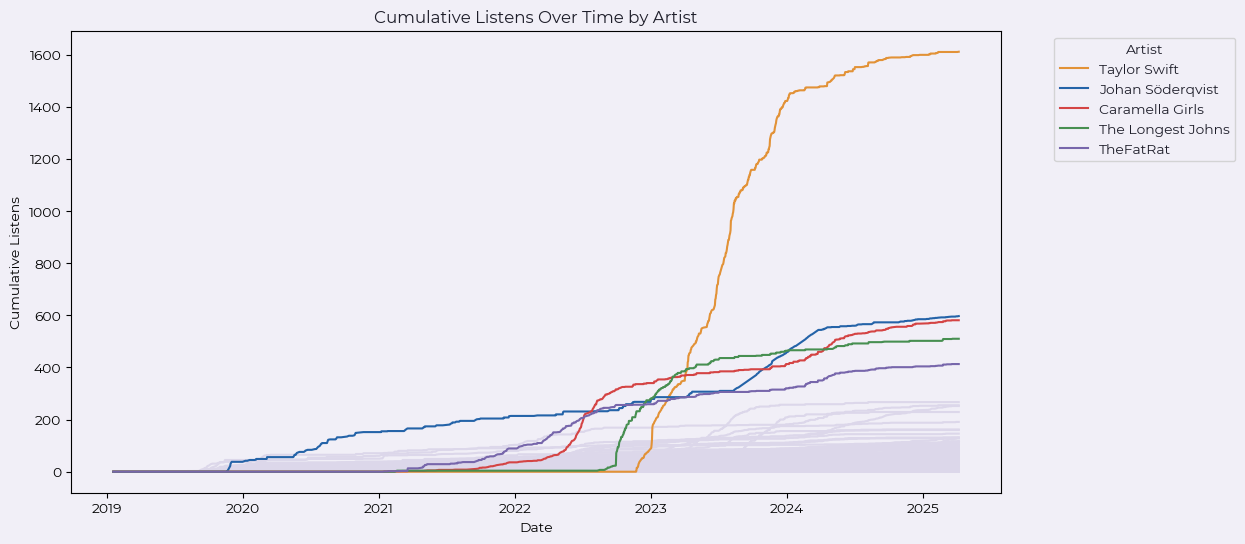

In [11]:
cumulative_for_artist(data)